<a href="https://colab.research.google.com/github/ishancoderr/GansForGenerate_TextileData/blob/main/GansForGenerateTouserData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat Jan  6 19:26:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Install git library (if not already installed)
!pip install gitpython

# Clone the GitHub repository
!git clone https://github.com/ishancoderr/GansForGenerate_TextileData.git

# Move to the directory containing the data
%cd GansForGenerate_TextileData/TrousersAnd

# List the files in the directory to verify that the data is present
!ls

# Now you can use imutils to list image files
from imutils import paths

# Specify the path to the directory containing image files
directory = '.'

# List all image files in the directory
image_files = list(paths.list_images(directory))

# Display the list of image files
print(image_files)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.3 MB/s eta 0:00:00
Cloning into 'GansForGenerate_TextileData'...
remote: Enumerating objects: 87, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 87 (delta 4), reused 0 (delta 0), pack-reused 63
Receiving objects: 100% (87/87), 470.60 KiB | 12.72 MiB/s, done.
Resolving deltas: 100% (5/5), done.
[Errno 2] No such file or directory: 'GansForGenerate_TextileData/TrousersAnd'
/content
GansForGenerate_TextileData  sample_data
['./GansForGenerate_TextileData/trousers/9.jpg', './GansForGenerate_TextileData/trousers/10.jpg', './GansForGenerate_TextileData/trousers/7.jpg', './GansForGenerate_TextileData/trousers/8.jpg', './GansForGenerate_TextileData/trousers/6.jpg', './GansForGenerate_TextileData/trousers/4.jpg', './GansForGenerate_TextileData/trousers/11.jpg', './GansForGenerate_Textile

In [5]:
impaths = image_files

In [7]:
# Importing libraries
import numpy as np
import pandas as pd
import glob
import imageio
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras import layers
from keras.layers import Dense, Reshape, Flatten, Conv2D, Conv2DTranspose, LeakyReLU, Dropout
from keras.initializers import RandomNormal
from tensorflow.keras.optimizers import Adam
from numpy.random import randn
from numpy.random import randint
import time
from IPython import display
import cv2
from imutils import paths

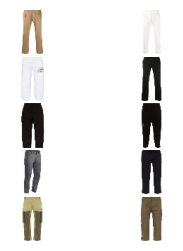

In [12]:
# Define a function to plot a single image
def plotExampleImage(img_n):
    # Load the image using cv2.imread and save it to a variable called "img"
    img = cv2.imread(impaths[img_n])
    # Get the shape of the image using np.shape
    np.shape(img)
    # Convert the color format of the image from BGR to RGB using cv2.cvtColor
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show the image using plt.imshow
    plt.imshow(img)
    # Turn off the axis labels using plt.axis('off')
    plt.axis('off')

# Create a new figure with size 12x8 using plt.figure
plt.figure(figsize=(3,3))

# Loop over the first 24 images in the dataset and plot each one using plotExampleImage
for k in range(10):
    # Create a subplot with 4 rows and 6 columns, and select the kth subplot
    plt.subplot(5,2,k+1)
    # Plot the kth image using plotExampleImage
    plotExampleImage(k)

# Adjust the spacing between the subplots using plt.subplots_adjust
plt.subplots_adjust(wspace=0.05, hspace=0.05)

So, by enabling NumPy-like behavior in TensorFlow, it's as if you're telling TensorFlow to understand and work with data in a way that's similar to how NumPy does things. This can make it easier for people who are familiar with NumPy to use TensorFlow without having to learn a completely different set of conventions

In [13]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [14]:
np.random.seed(42)
tf.random.set_seed(42)

tf.random.set_seed(42) (TensorFlow):

Why: TensorFlow also uses random numbers, especially in neural network initialization and certain operations.

How: Similar to NumPy, setting the TensorFlow random seed ensures reproducibility. If you use the same seed (42), you'll get the same random behavior in TensorFlow each time you run your code.

setting random seeds helps make your code predictable. If someone else runs your code or if you need to rerun it later, having fixed seeds ensures that the randomness is consistent, making it easier to compare results or debug issues.